In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
te = pd.read_csv('../input/te/dk_stats_loc.csv')

In [4]:
# Convert attributes from to correct data type
def conv_atts(df):
    df['salary'] = df['salary'].apply(lambda x: int(x))
    df['h/a_1'] = df['h/a_1'].astype('category')
    df['surface_0'] = df['surface_0'].astype('category')
    df['def_rk'] = df['def_rk'].astype('category')
    df['PlayerID'] = df['PlayerID'].astype('category')

    return df

In [5]:
te = conv_atts(te)

In [6]:
te.dtypes

year                int64
PlayerID         category
Name               object
Team               object
Week                int64
Opponent           object
tar                 int64
rec                 int64
rec%              float64
yds                 int64
td                  int64
ReceivingLong       int64
yds/tar           float64
yds/rec           float64
ru_att              int64
ru_yds              int64
ru_yds/att        float64
ru_td               int64
fum                 int64
def_rk           category
h/a_1            category
surface_0        category
salary              int64
points            float64
dtype: object

In [32]:
te.shape

(4711, 23)

In [38]:
te[te['tar']==0].shape

(0, 23)

In [7]:
drop_lst =[]
for idx,tar in enumerate(te['tar']):
    if tar ==0:
        drop_lst.append(idx)
        
len(drop_lst)

1528

In [8]:
te.drop(drop_lst, inplace=True)

In [9]:
te[te['Name']=='Travis Kelce']

,year,PlayerID,Name,Team,Week,Opponent,tar,rec,rec%,yds,...,ru_att,ru_yds,ru_yds/att,ru_td,fum,def_rk,h/a_1,surface_0,salary,points
56,2015,15048,Travis Kelce,KC,1,HOU,6,6,100.0,106,...,0,0,0.0,0,0,10,0.0,0.0,2500,31.6
143,2015,15048,Travis Kelce,KC,2,DEN,5,4,80.0,58,...,0,0,0.0,0,0,19,1.0,1.0,2500,9.8
233,2015,15048,Travis Kelce,KC,3,GB,10,6,60.0,80,...,0,0,0.0,0,0,14,0.0,1.0,3000,16.0
310,2015,15048,Travis Kelce,KC,4,CIN,7,5,71.4,49,...,0,0,0.0,0,1,17,0.0,0.0,2500,8.9
392,2015,15048,Travis Kelce,KC,5,CHI,6,3,50.0,35,...,0,0,0.0,0,0,13,1.0,1.0,2500,6.5
474,2015,15048,Travis Kelce,KC,6,MIN,7,5,71.4,88,...,0,0,0.0,0,0,15,0.0,0.0,2500,13.8
553,2015,15048,Travis Kelce,KC,7,PIT,6,5,83.3,73,...,0,0,0.0,0,0,25,1.0,1.0,3000,12.3
629,2015,15048,Travis Kelce,KC,8,DET,8,6,75.0,49,...,0,0,0.0,0,0,27,1.0,1.0,5400,16.9
780,2015,15048,Travis Kelce,KC,10,DEN,9,5,55.6,36,...,0,0,0.0,0,0,19,0.0,1.0,2500,8.6
861,2015,15048,Travis Kelce,KC,11,LAC,7,5,71.4,46,...,0,0,0.0,0,0,18,0.0,1.0,2500,9.6


In [14]:
te.drop('ReceivingLong', axis=1, inplace=True)

In [10]:
def boxplotter(data, column_name):
    fig= plt.figure(figsize=(6,4))

    ax = sns.boxplot(data[column_name], orient='v',
                    fliersize=8, linewidth=1.5, notch=False,
                    saturation=0.5)
    ax.set_title(column_name, fontsize=20)
    plt.show()

In [10]:
rush_cols = [col for col in te.columns if 'ru' in col]
rec_cols =[col for col in te.columns if 'ru' not in col]

In [19]:
rem_cols = ['PlayerID','Name','Team','Opponent','def_rk','h/a_1','surface_0', 'year','Week']
for col in rem_cols:
    rec_cols.remove(col)

In [20]:
rush_cols.append('points')


In [21]:
rec_cols

['tar',
 'rec',
 'rec%',
 'yds',
 'td',
 'yds/tar',
 'yds/rec',
 'fum',
 'salary',
 'points']

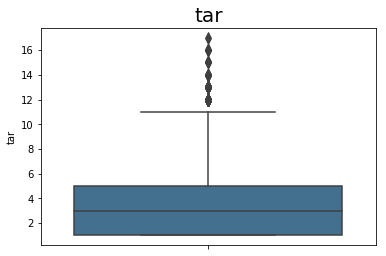

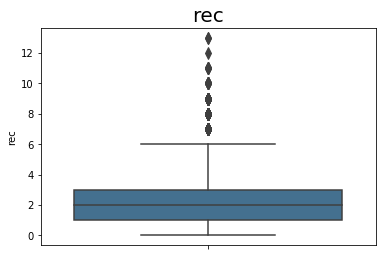

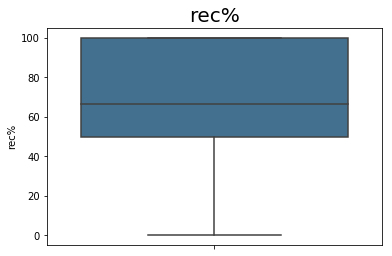

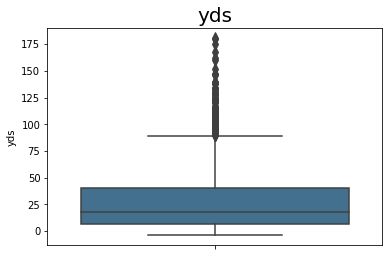

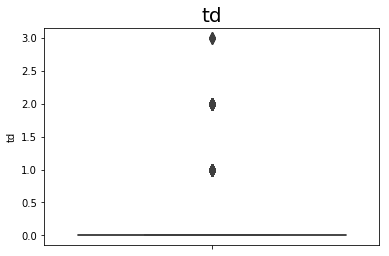

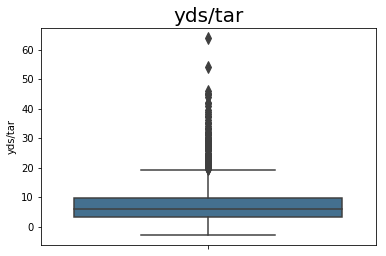

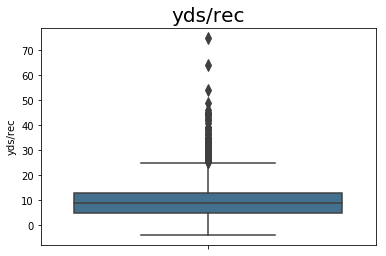

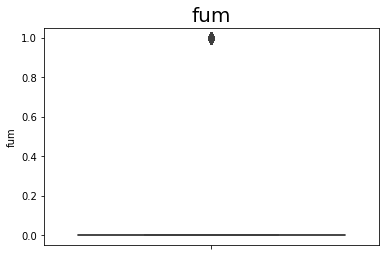

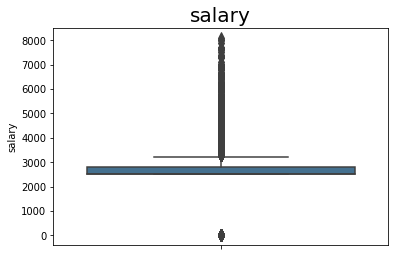

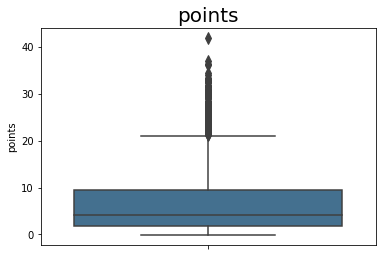

In [39]:
for col in rec_cols:
    boxplotter(te,col)

In [41]:
te['yds'].describe()

count    3183.000000
mean       27.241910
std        27.811397
min        -4.000000
25%         7.000000
50%        18.000000
75%        40.000000
max       181.000000
Name: yds, dtype: float64

In [42]:
temp = te.drop('year', axis=1)

Text(0.5,1,'TE Stats')

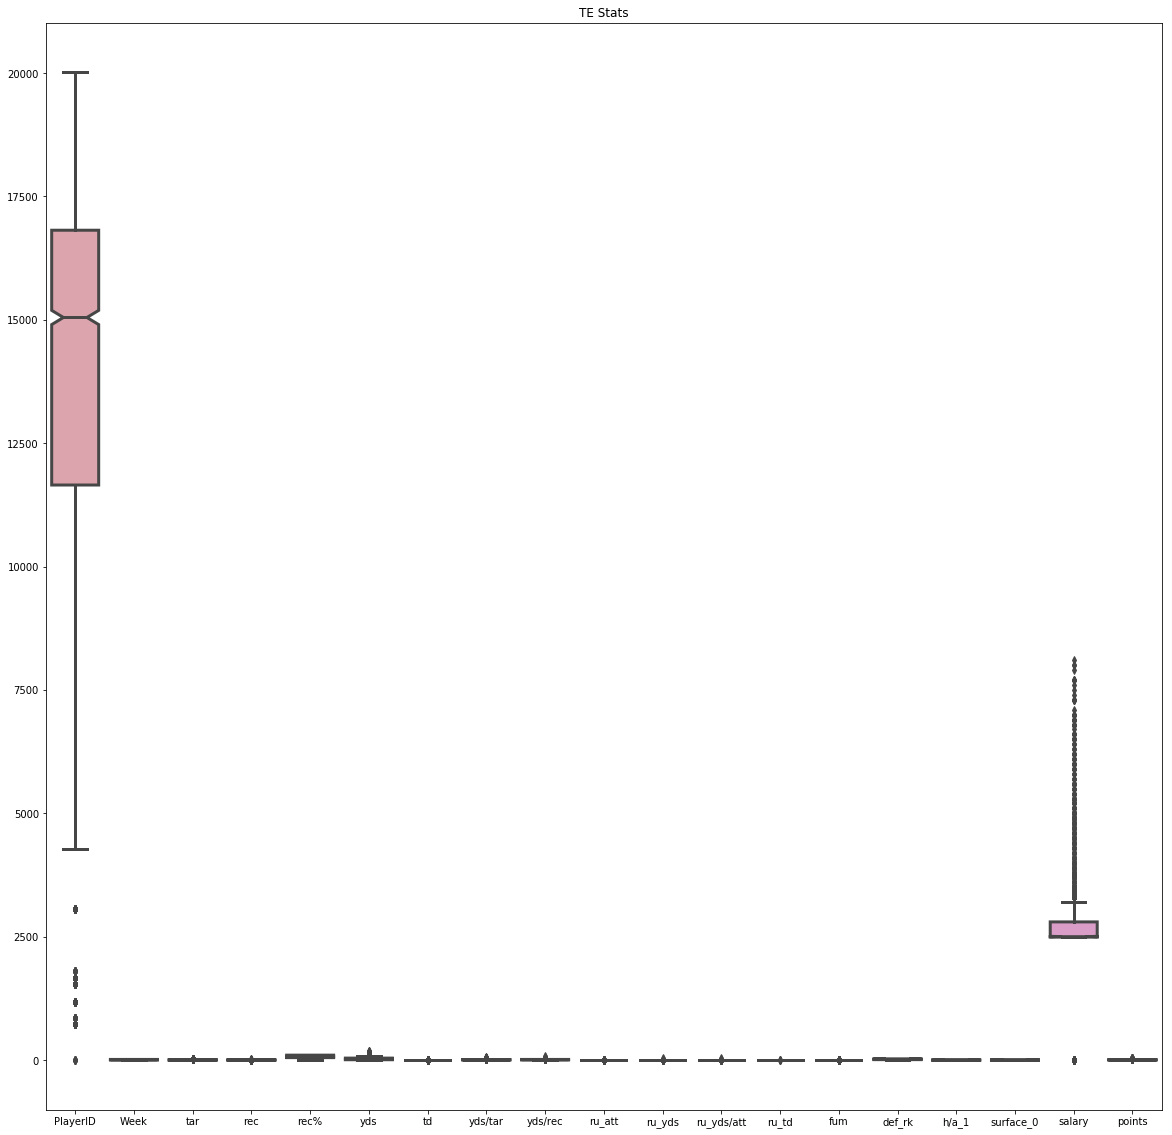

In [43]:
fig = plt.figure(figsize=(20,20))

ax = sns.boxplot(data=temp, orient='v', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5)

ax.set_title('TE Stats')

In [44]:
te.corr()

,year,Week,tar,rec,rec%,yds,td,yds/tar,yds/rec,ru_att,ru_yds,ru_yds/att,ru_td,fum,salary,points
year,1.000000,-0.208657,-0.061604,-0.057008,-0.003925,-0.030774,-0.024921,0.036448,0.039224,0.028127,-0.003778,-0.003778,-0.013078,0.007585,0.054205,-0.045026
Week,-0.208657,1.000000,-0.002425,-0.014000,-0.006233,-0.030242,-0.005732,-0.026128,-0.019494,0.002867,0.021048,0.021048,-0.018988,0.004833,-0.054422,-0.023441
tar,-0.061604,-0.002425,1.000000,0.895468,0.002258,0.763213,0.317311,0.026998,0.181569,0.033475,0.063956,0.063956,-0.003414,0.114754,0.007258,0.776942
rec,-0.057008,-0.014000,0.895468,1.000000,0.337364,0.849055,0.352100,0.220929,0.235477,0.048343,0.057602,0.057602,0.003727,0.135830,-0.003952,0.865090
rec%,-0.003925,-0.006233,0.002258,0.337364,1.000000,0.278436,0.121182,0.576334,0.351117,0.030169,0.001612,0.001612,0.010281,0.040012,-0.009859,0.284580
yds,-0.030774,-0.030242,0.763213,0.849055,0.278436,1.000000,0.356833,0.511248,0.567250,0.043281,0.048033,0.048033,0.015234,0.086082,-0.006204,0.896722
td,-0.024921,-0.005732,0.317311,0.352100,0.121182,0.356833,1.000000,0.145355,0.167114,-0.005864,-0.020890,-0.020890,-0.002784,0.022861,0.006528,0.698559
yds/tar,0.036448,-0.026128,0.026998,0.220929,0.576334,0.511248,0.145355,1.000000,0.879644,0.021150,0.011759,0.011759,0.012423,-0.003255,-0.011438,0.367078
yds/rec,0.039224,-0.019494,0.181569,0.235477,0.351117,0.567250,0.167114,0.879644,1.000000,0.025953,0.026260,0.026260,0.016577,-0.004528,-0.003129,0.405962
ru_att,0.028127,0.002867,0.033475,0.048343,0.030169,0.043281,-0.005864,0.021150,0.025953,1.000000,0.488500,0.488500,0.260396,-0.012597,0.000772,0.052116


In [45]:
corr = pd.DataFrame(index=te.columns[4:12])

In [46]:
te.head()

,year,PlayerID,Name,Team,Week,Opponent,tar,rec,rec%,yds,...,ru_att,ru_yds,ru_yds/att,ru_td,fum,def_rk,h/a_1,surface_0,salary,points
1,2015,722,Jason Witten,DAL,1,NYG,9,8,88.9,60,...,0,0,0.0,0,0,31,1.0,0.0,4000,26.0
2,2015,852,Jacob Tamme,ATL,1,PHI,3,3,100.0,19,...,0,0,0.0,0,0,11,1.0,0.0,2600,4.9
3,2015,1181,Martellus Bennett,CHI,1,GB,7,5,71.4,55,...,0,0,0.0,0,0,14,1.0,1.0,4300,16.5
4,2015,1545,Anthony Fasano,TEN,1,TB,1,1,100.0,18,...,0,0,0.0,0,0,21,0.0,1.0,2500,2.8
5,2015,1658,Greg Olsen,CAR,1,JAX,3,1,33.3,11,...,0,0,0.0,0,0,28,0.0,1.0,5300,2.1


In [19]:
te.drop('ReceivingLong', axis=1,inplace=True)

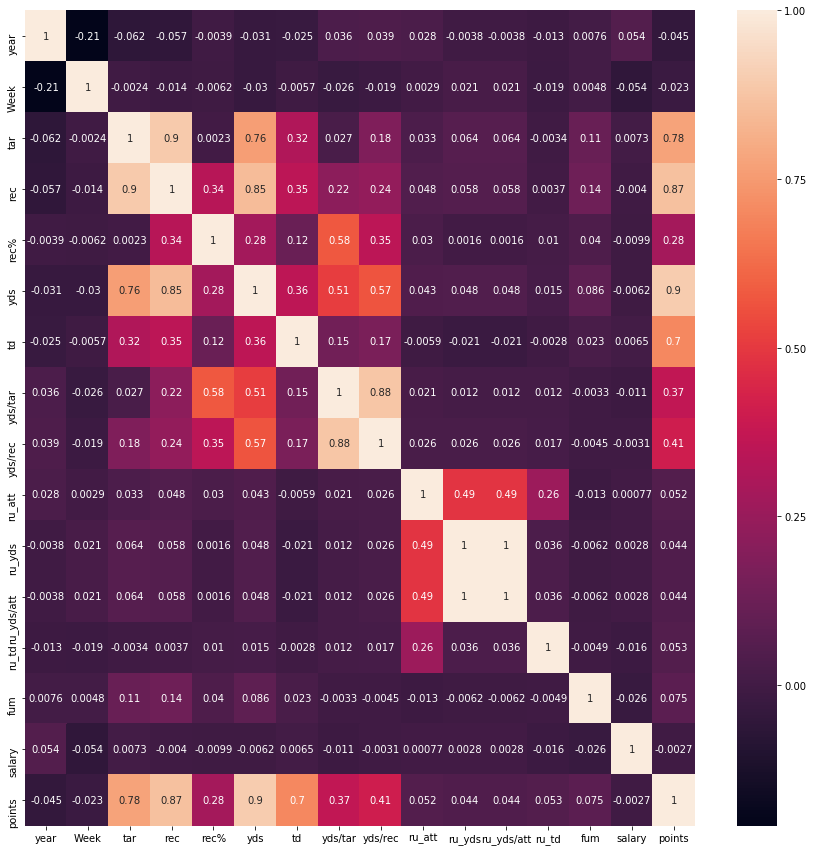

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(te.corr(), annot=True)

In [21]:
corr[1] = coef

In [22]:
corr

,1
ReceivingTargets,0.734807
Receptions,0.788035
ReceptionPercentage,0.487435
ReceivingYards,0.859434
ReceivingTouchdowns,0.829000
ReceivingLong,0.539082
ReceivingYardsPerTarget,0.581895
ReceivingYardsPerReception,0.026487


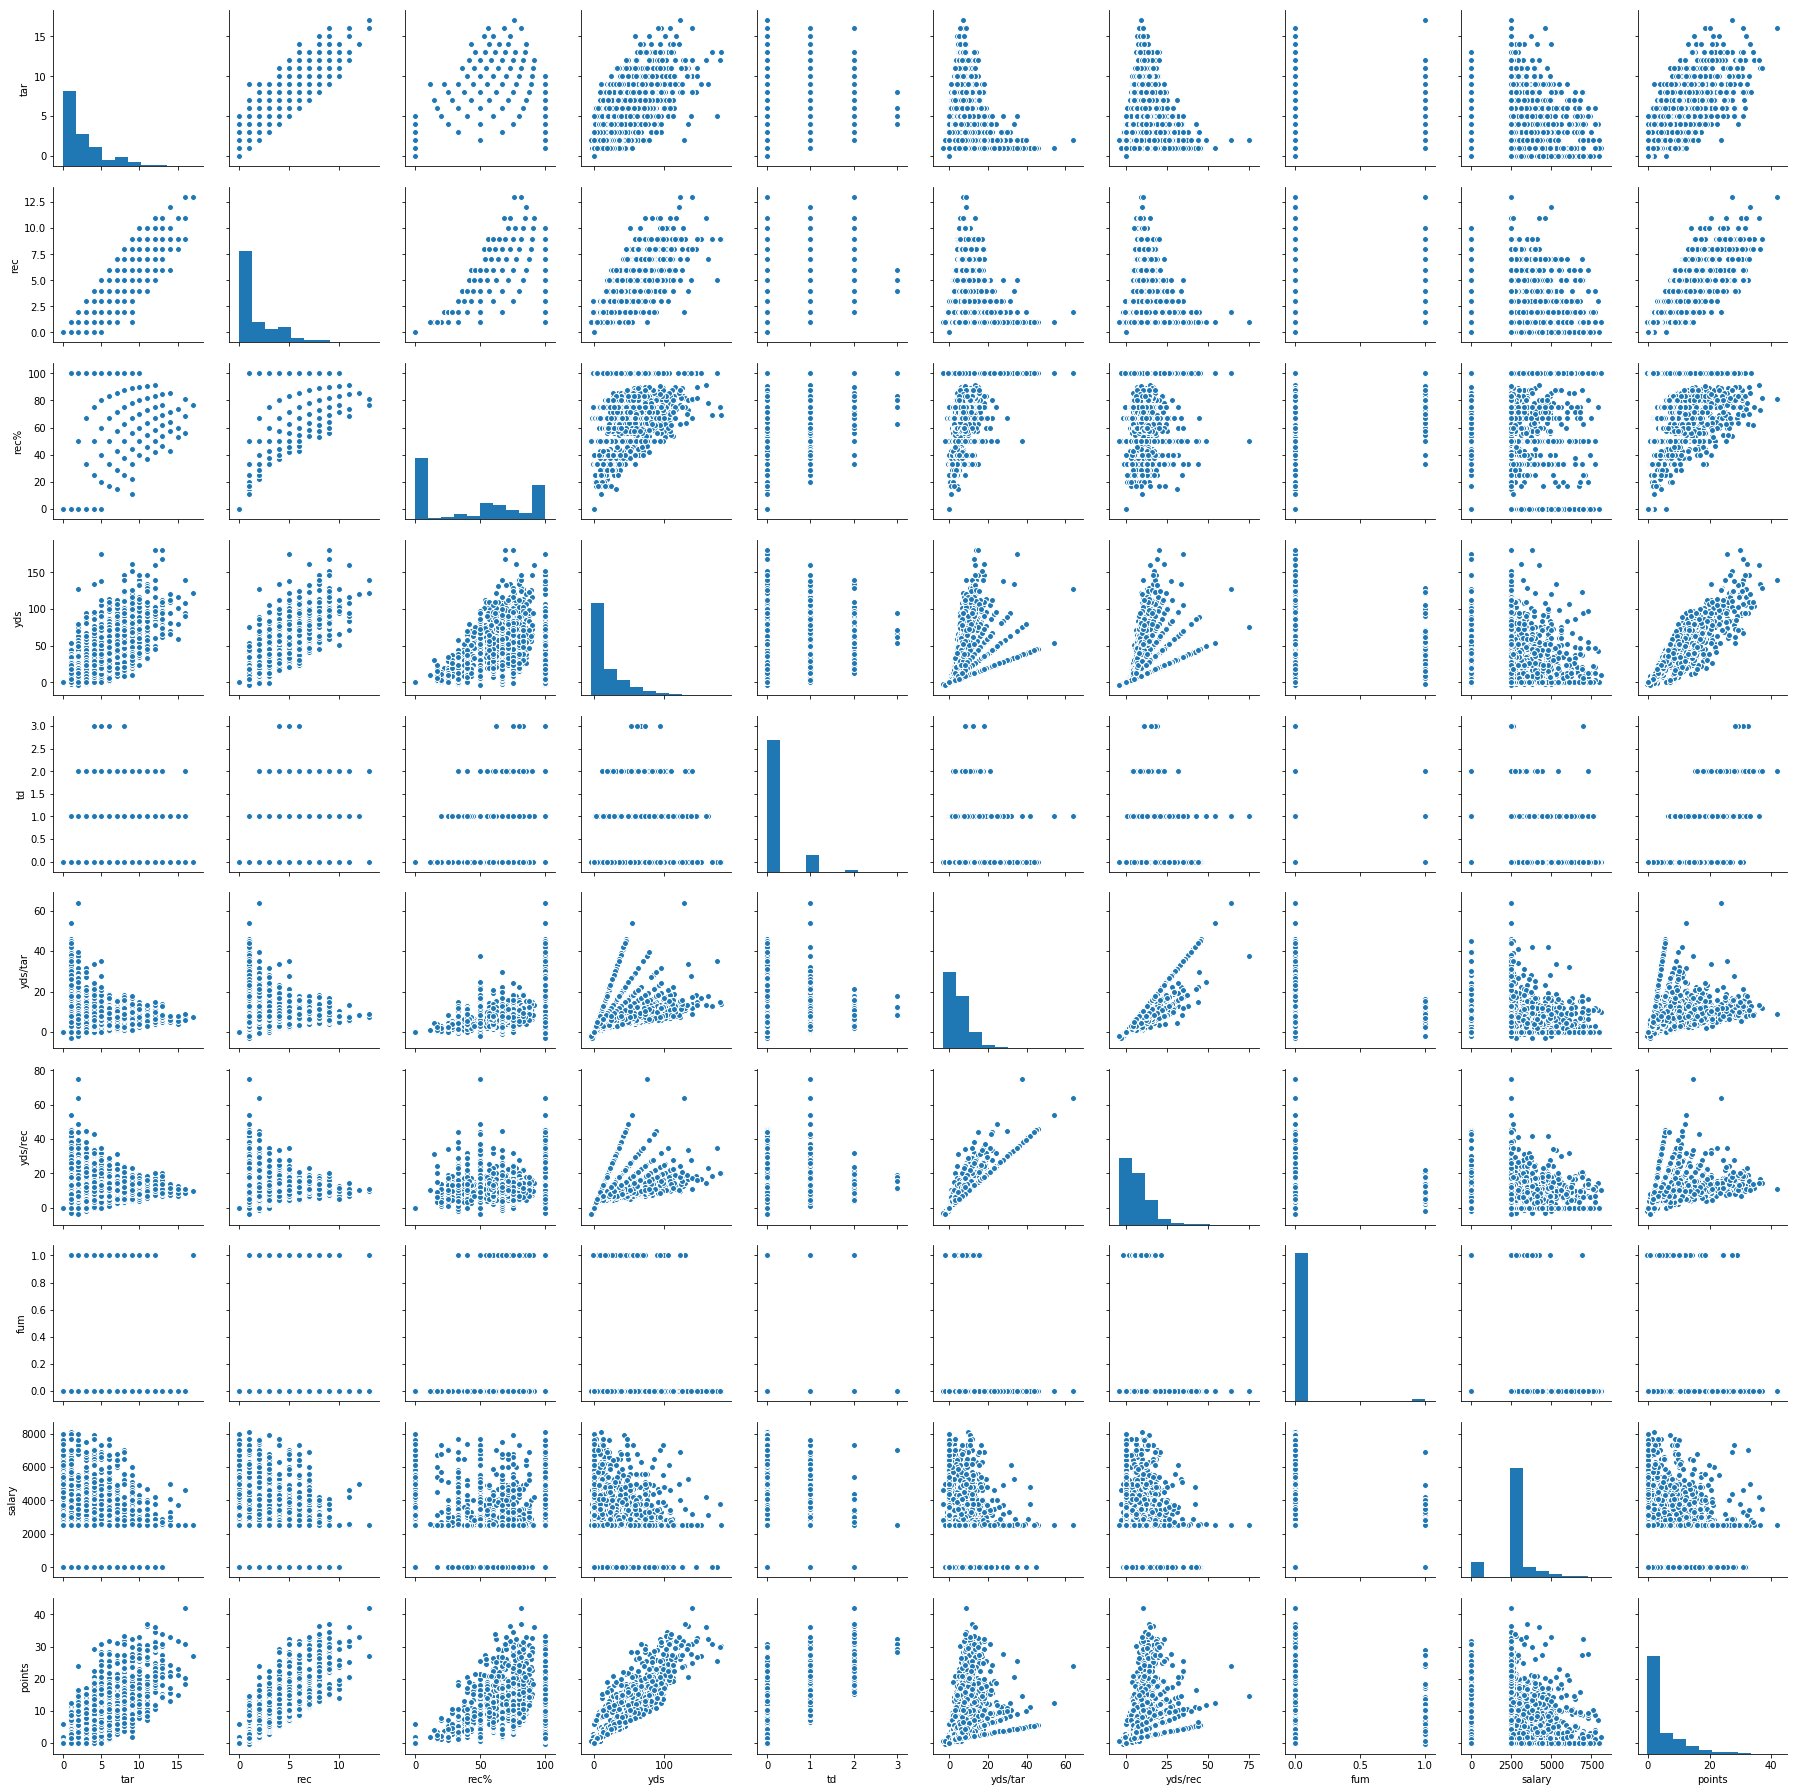

In [28]:
sns.pairplot(te[rec_cols])


## Outliers

In [54]:
te.shape

(3183, 23)

In [50]:
def get_outliers(df):
    #rem_cols = ['Week','Year','Name','Opponent','Team']
    col_dict ={}
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_dict.update({col:df[col].describe()})

    col_name = []
    outliers_lst = []
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_name.append(col)
            outliers_lst.append(len(abs(df[col]-col_dict[col]['mean'])[df[col] > (col_dict[col]['std'])*3]))
            
    outliers= pd.DataFrame()
    outliers['col_name'] = col_name
    outliers['# of outliers'] = outliers_lst
    


    

    percent_lst = [ ]
    for idx, val in enumerate(outliers['# of outliers']):
        percent_lst.append(val/int(df.shape[0])*100)

    outliers['pecent'] = percent_lst
    outliers = outliers.drop(outliers.index[:2])


In [52]:
outliers = get_outliers(te)

In [11]:
te_eda = te.drop(rush_cols, axis=1)
te_eda.head()

,year,PlayerID,Name,Team,Week,Opponent,tar,rec,rec%,yds,td,ReceivingLong,yds/tar,yds/rec,fum,def_rk,h/a_1,surface_0,salary,points
1,2015,722,Jason Witten,DAL,1,NYG,9,8,88.9,60,2,15,6.7,7.5,0,31,1.0,0.0,4000,26.0
2,2015,852,Jacob Tamme,ATL,1,PHI,3,3,100.0,19,0,8,6.3,6.3,0,11,1.0,0.0,2600,4.9
3,2015,1181,Martellus Bennett,CHI,1,GB,7,5,71.4,55,1,24,7.9,11.0,0,14,1.0,1.0,4300,16.5
4,2015,1545,Anthony Fasano,TEN,1,TB,1,1,100.0,18,0,18,18.0,18.0,0,21,0.0,1.0,2500,2.8
5,2015,1658,Greg Olsen,CAR,1,JAX,3,1,33.3,11,0,11,3.7,11.0,0,28,0.0,1.0,5300,2.1


In [12]:
te_eda.drop('yds/tar',axis=1, inplace=True)
te_eda.drop('rec%',axis=1,inplace=True)

In [13]:
te_eda.drop('yds/rec',axis=1,inplace=True)
te_eda.head()

,year,PlayerID,Name,Team,Week,Opponent,tar,rec,yds,td,ReceivingLong,fum,def_rk,h/a_1,surface_0,salary,points
1,2015,722,Jason Witten,DAL,1,NYG,9,8,60,2,15,0,31,1.0,0.0,4000,26.0
2,2015,852,Jacob Tamme,ATL,1,PHI,3,3,19,0,8,0,11,1.0,0.0,2600,4.9
3,2015,1181,Martellus Bennett,CHI,1,GB,7,5,55,1,24,0,14,1.0,1.0,4300,16.5
4,2015,1545,Anthony Fasano,TEN,1,TB,1,1,18,0,18,0,21,0.0,1.0,2500,2.8
5,2015,1658,Greg Olsen,CAR,1,JAX,3,1,11,0,11,0,28,0.0,1.0,5300,2.1


In [15]:
te_eda.drop('ReceivingLong',axis=1,inplace=True)

In [16]:
te_eda.head()

,year,Name,Team,Week,Opponent,tar,rec,yds,td,fum,def_rk,h/a_1,surface_0,salary,points
1,2015,Jason Witten,DAL,1,NYG,9,8,60,2,0,31,1.0,0.0,4000,26.0
2,2015,Jacob Tamme,ATL,1,PHI,3,3,19,0,0,11,1.0,0.0,2600,4.9
3,2015,Martellus Bennett,CHI,1,GB,7,5,55,1,0,14,1.0,1.0,4300,16.5
4,2015,Anthony Fasano,TEN,1,TB,1,1,18,0,0,21,0.0,1.0,2500,2.8
5,2015,Greg Olsen,CAR,1,JAX,3,1,11,0,0,28,0.0,1.0,5300,2.1


In [17]:
te_eda.to_csv('../input/te/te_loc_cleaned.csv', index=False)